In [ ]:
#Reading in file

In [1]:
#Import modules
import tethne as rd
import re
import unicodedata
import itertools
import pickle
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pygraphviz
import community # for community identification
# import pymnet as pmn # for multilayer network visualization
from collections import deque

from tethne.readers import wos

In [1]:
# import tethne as rd
# from tethne.readers.wos import WoSParser
# parser = WoSParser("savedrecs.txt")
# dir(parser)
# papers = parser.parse()
#CA=rd.networks.authors.coauthors(papers)
#dir(rd.networks.authors.coauthors)
#dir(rd.readers)
#print rd.__doc__
#wos_list = wos.parse("savedrecs.txt")
#wos_list.keys()
#for paper in corpus: print paper['WC']
#corpus[0]["WC"]
#len(corpus)
#CA.size()
#print (nx.number_of_nodes(CA),nx.number_of_edges(CA))

In [2]:
# address=[str(a) for a in papers[0]['authorAddress']]
# papers[0]['authorAddress']
# address

In [28]:
#papers[0]['authors_init']

In [25]:
#papers[0]['authors_full']

In [24]:
#papers[0]['authors']

In [2]:
corpus = wos.read("C://Users//Roseric//Documents//bibProject//hivaids//hivaids")
corpus
CA=rd.networks.authors.coauthors(corpus)

In [3]:
from __future__ import division
# print pygraphviz.__doc__
# dir(corpus[1])
len(corpus[1]['authors'])
nAuth=0
for p in corpus:
    nAuth+=len(p['authors'])
print len(corpus),'papers for a total of',nAuth,'authors. On average',round(nAuth/len(corpus),2),'authors per paper.'

102 papers for a total of 966 authors. On average 9.47 authors per paper.


In [4]:
print 'Total number of Papers =', len(corpus)
# type(int(corpus[10]['date']))

Total number of Papers = 102


In [5]:
#Author Name Disambiguation
# import re
# import unicodedata
# # Create csv file for AND (Author Name Disambiguation)
# # csvFile="authors.csv"
# csvFile="authors2.csv"
# f=open(csvFile,'w')
# numId=1
# header="Id,init_name,last_name,first_name,affiliation,city,country\n"
# f.write(header)
# for paper in corpus:
#     for i in range(0,len(paper['authors'])):
#         init_name=str(paper['authors_init'][i][0]+' '+paper['authors_init'][i][1])
#         last_name=str(paper['authors_full'][i][0])
#         first_name=str(paper['authors_full'][i][1])
#         full_name=str(paper['authors_full'][i][0]+' '+paper['authors_full'][i][1])
# #         if 'authorAddress' in dir(paper):author_address=paper['authorAddress']
# #         numId+=1
# #         print author_address, i
# #         print paper['authorAddress']
#         try:
#             author_list=[unicodedata.normalize('NFKD', a).encode('ascii','ignore') for a in paper['authorAddress']]
#         except AttributeError: author_list=[]
# #         print i,' ',author_list
#         #else: author_list=[]
#         affiliation=''
#         city=''
#         country=''
#         for addr in author_list:
#             #print paper['authors']
#             #print addr
#             try:
#                 address=re.sub('[,.]', '', addr[addr.index("[") + 1:addr.index("]")]).split('; ')
#             except ValueError: address=[]
#             address_list=[ad.lower() for ad in address]
#             if full_name.lower() in address_list:
#                 full_address=re.sub('[.]','',addr.split('] ')[-1])
#                 city=full_address.split(',')[-2].lstrip()
#                 country=full_address.split(',')[-1].lstrip()
#                 affiliation=re.sub("[\[\]',]","",str(full_address.split(',')[:-2]))
#                 numId += 1
#             else:
#                 numId += 1
#             f.write(str(numId-1)+','+init_name+','+last_name+','+first_name+','+affiliation+','+city+','+country+','+'\n')
# #             print str(numId)+','+init_name+','+full_name+','+affiliation+','+city+','+country
# #             f.write(str(numId-1)+','+init_name+','+full_name+','+affiliation+','+city+','+country+','+'\n')
# f.close()

In [5]:
authFile=open("authHIV_dict.csv","r")
authFile.readline()
auth_dict={}

for line in authFile:
    lineList=line.strip('\n').split(',')
    auth_dict[lineList[4]]=[int(lineList[0]), str(lineList[5]), str(lineList[6]), str(lineList[7]), str(lineList[8])]
authFile.close()
len(auth_dict)

612

In [130]:
# nf=open("notfound.csv","r")
# notFound=[]
# for line in nf:
#     notFound.append(str(line.strip('\n')))
# nf.close()
# nfFile = open("nfFile.txt","wb")
# print notFound

In [6]:
#Function definition

###Defining function addAuthors()
def addAuthors(paper, auth_dict, netw):
    authors={}
    for i in range(0,len(paper['authors'])):
        full_name=str(paper['authors_full'][i][0]+' '+paper['authors_full'][i][1])
        authors[auth_dict[full_name][0]]=auth_dict[full_name]
    auth=[k for k in authors]
    edges = itertools.combinations(auth,2)
    for k in authors:
#         country=authors[k][4]
        if k not in netw:
            netw.add_node(k, name=authors[k][1], affil=authors[k][2], place=authors[k][3], country=authors[k][4])
#     if full_name in notFound:
#         try: nfFile.write(full_name+'--->'+str(paper['wosid'])+str(paper['authorAddress'])+'\n')
#         except: nfFile.write(full_name+'--->'+str(dir(paper))+str(paper['wosid'])+'\n')
    title=str(paper['title'])
    timesCited=0
    if 'doi' in dir(paper):doi=str(paper['doi'])
    else: doi='N/A'
    if 'wosid' in dir(paper):wosid=str(paper['wosid']) 
    else: wosid='N/A'
    if 'journal' in dir(paper):journal=str(paper['journal']) 
    else: journal='N/A'
    if 'abstract' in dir(paper):abstract=str(paper['abstract'])
    if 'timesCited' in dir(paper) and type(paper['timesCited'][0]) != unicode: timesCited=int(paper['timesCited'][0])
    else: abstract='N/A'
    subject=re.sub('[\[\]]','',str(paper['subject']))
    year=int(paper['date'])
    netw.add_edges_from(edges,
                        title=title,
                        journal=journal,
                        wosid=wosid,
                        doi=doi,
                        subject=subject,
                        year=year,
                        timesCited=timesCited
#                         abstract=abstract
                       )

###Defining degree distribution plot function
def plotDegree(G):
    #Degree distribution
    #in_degrees= cam_net.in_degree() 
    # dictionary node:degree
    #in_values= sorted(set(in_degrees.values()))
    degree=G.degree().values()
    in_values=sorted(set(degree))
    in_hist= [degree.count(x) for x in in_values]
    
    plt.figure() # you need to first do 'import pylab as plt '
    plt.grid(True)
    plt.plot(in_values, in_hist, 'bo', markersize=4) # in-degree
    plt.loglog(in_values,in_hist,'bo', markersize=4)
    #plt.plot(out_values, out_hist, 'bv-') # out-degree
    #plt.legend(['In-degree', 'Out-degree'])
    plt.legend(['Degree'])
    plt.xlabel('Degree')
    plt.ylabel('Number of nodes')
    #plt.title('network of places in Cambridge')
    plt.title('co-authorship network degree distribution')
    plt.xlim([0, 14*10**2])
    plt.show()
    #plt.savefig('./output/cam_net_degree_distribution.pdf')
    #plt.close()
    
#Defining centrality scatter function
def centrality_scatter(dict1,dict2,#path="",
                       ylab="",xlab="",title="",line=False):
    # Create figure and drawing axis
    fig = plt.figure(figsize=(7,7))
    ax1 = fig.add_subplot(111)
    # Create items and extract centralities
    items1 = sorted(dict1.items())
    items2 = sorted(dict2.items())
    xdata=[b for a,b in items1]
    ydata=[b for a,b in items2] 
    # Add each actor to the plot by ID 
    for p in xrange(len(items1)):
        ax1.text(x=xdata[p], y=ydata[p],s=str(items1[p][0]), color="b")
    if line:
        # use NumPy to calculate the best fit
        slope, yint = plt.polyfit(xdata,ydata,1)
        xline = plt.xticks()[0] 
        yline = map(lambda x: slope*x+yint,xline)
        ax1.plot(xline,yline,ls='--',color='b')
    # Set new x- and y-axis limits
    plt.xlim((0.0,max(xdata)+(.15*max(xdata))))
    plt.ylim((0.0,max(ydata)+(.15*max(ydata))))
    # Add labels and save
    ax1.set_title(title)
    ax1.set_xlabel(xlab) 
    ax1.set_ylabel(ylab) 
    plt.show()
#     plt.savefig(path)


#Defining more analysis functions
def breadth_first_search(g, source): 
    queue = deque([(None, source)]) 
    enqueued = set([source]) 
    while queue:
        parent,n = queue.popleft() 
        yield  parent,n
        new = set(g[n]) - enqueued 
        enqueued |= new
        queue.extend([(n, child) for child in new])

def avg_neigh_degree(g):
     return dict((n,float(sum(g.degree(i) for i in g[n]))/g.degree(n))
                 for n in g.nodes() if g.degree(n))
    
def get_triangles(g):
    for n1 in g.nodes:
        neighbors1 = set(g[n1])
        for n2 in filter(lambda x: x>n1, nodes):
            neighbors2 = set(g[n2]) 
            common = neighbors1 & neighbors2
            for n3 in filter(lambda x: x>n2, common):
                yield n1,n2,n3

# Transfer attributes from MultiGraph object to graph object
def transAtt(H, G, attrList):
    for attr in attrList:
        D = {}
        for u in G:
            D[u] = H.node[u][attr]
        nx.set_node_attributes(G, attr, D)

# Addind the times cited and numPub count as node attributes
def addCitedNumPub(CAnet):
    nCited = {}
    nPapers = {}
    for u in CAnet:
        sumCited=0 # initialise author's citation sum
        papers={}
        for v in CAnet.neighbors(u):# get v's neighbors
            for i in list(CAnet[u][v].iterkeys()):
                # get all v's papers and times cited
                papers[CAnet[u][v][i]['wosid']]=papers.get(CAnet[u][v][i]['wosid'],CAnet[u][v][i]['timesCited'])
        sumCited = sum([papers[k] for k in papers.keys()])
        nCited[u] = sumCited
        nPapers[u] = len(papers)
    nx.set_node_attributes(CAnet, 'timesCited', nCited)
    nx.set_node_attributes(CAnet, 'numPub', nPapers)

# Subsetting Network by time periods
def subGraph(G, year, subFolderName):
    for y in year:
        period = [int(i) for i in y.split('-')]
        temp = CAnet2.copy()
        for edge in list(temp.edges_iter()):
            for k in temp[edge[0]][edge[1]].keys():
                if len(period)==2:
                    if temp[edge[0]][edge[1]][k]['year']<period[0] or temp[edge[0]][edge[1]][k]['year']>period[1]:
                        del temp[edge[0]][edge[1]][k]
                else:
                    if temp[edge[0]][edge[1]][k]['year']!=period[0]:
                        del temp[edge[0]][edge[1]][k]
        addCitedNumPub(temp)
        print y,': ',' Nodes:',temp.order(),' Edges:',temp.size()
        nx.write_graphml(temp,'graph/'+subFolderName+'/CAnet_'+str(y)+'.graphml')

In [7]:
#Creating Multivariate Network
CAnet=nx.MultiGraph()
for paper in corpus:
    addAuthors(paper,auth_dict,CAnet)
# nfFile.close()

In [8]:
# Addind the times cited count as node attributes
nCited = {}
nPapers = {}
for u in CAnet:
    sumCited=0 # initialise author's citation sum
    papers={}
    for v in CAnet.neighbors(u):# get v's neighbors
        for i in list(CAnet[u][v].iterkeys()):
            # get all v's papers and times cited
            papers[CAnet[u][v][i]['wosid']]=papers.get(CAnet[u][v][i]['wosid'],CAnet[u][v][i]['timesCited'])
    sumCited = sum([papers[k] for k in papers.keys()])
    nCited[u] = sumCited
    nPapers[u] = len(papers)
nx.set_node_attributes(CAnet, 'timesCited', nCited)
nx.set_node_attributes(CAnet, 'numPub', nPapers)

In [9]:
# nx.get_node_attributes(CAnet,'timesCited')
ent=219
print 'name:',CAnet.node[ent]['name'],'   numb. of Publ.:',CAnet.node[ent]['numPub'],'   timesCited:',CAnet.node[ent]['timesCited']

name: AVEIKA AKUM    numb. of Publ.: 1    timesCited: 7


In [16]:
#Writing Whole graph to GraphML
nx.write_graphml(CAnet, "graph/HIVnet.graphml")

In [10]:
#Generating 16 years training net for link prediction using predlink
##Training_set = CA_training
##Testing_set = CA_testing
CA_training=nx.MultiGraph()
CA_testing=nx.MultiGraph()
for paper in corpus:
    if int(paper['date'])<= 2014:
        addAuthors(paper,auth_dict,CA_training)
    else:
        addAuthors(paper,auth_dict,CA_testing)
#Visualizing Network

In [18]:
trainTest = [CA_training, CA_testing] # a list containing training and testing set
pickle.dump( trainTest, open( "pickle/trainTest.p", "wb" ) )

In [19]:
#Wrinting training and testing graph to pajek files
# nx.write_pajek(CA_training,'linkpred/HIVnet_training.net')
# nx.write_pajek(CA_testing,'linkpred/HIVnet_testing.net')

In [20]:
#Wrinting training and testing graph to GraphML files
# nx.write_graphml(CA_training,'linkpred/HIVnet_training.graphml')
# nx.write_graphml(CA_testing,'linkpred/HIVnet_testing.graphml')

In [12]:
# paper['authors']

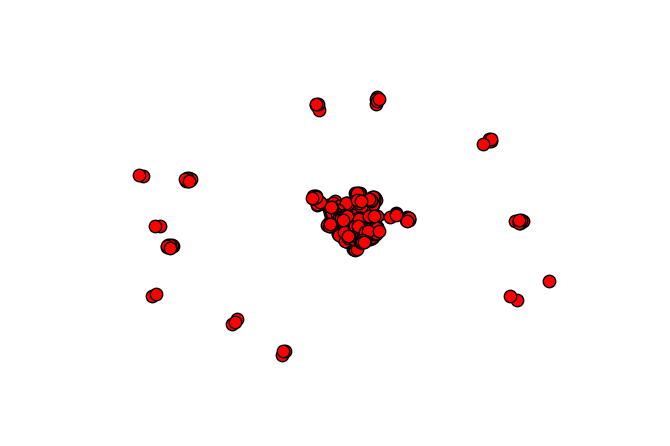

In [11]:
pos=nx.spring_layout(CAnet)
nx.draw(CAnet,pos, node_size=80)
plt.show()

In [12]:
#Identifying Co-authorship Communities
# dir(community)
#Converting CAnet multigraph to graph
G = nx.Graph()
for u,v,data in CAnet.edges_iter(data=True):
    w = data['weight'] if 'weight' in data else 1.0
    if G.has_edge(u,v):
        G[u][v]['weight'] += w
    else:
        G.add_edge(u, v, weight=w)


attrList = ['name', 'affil', 'place', 'country', 'timesCited', 'numPub']
transAtt(CAnet, G, attrList)

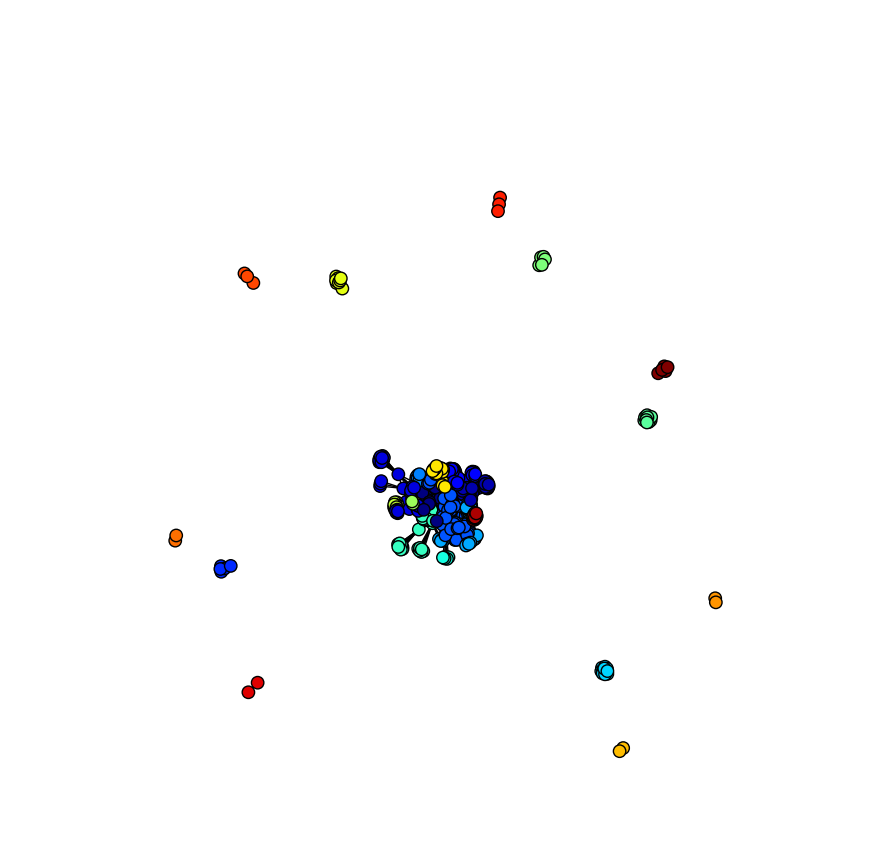

In [13]:
#Identifying Communities and drawing G
part = community.best_partition(G)
values = [part.get(node) for node in G.nodes()]
plt.figure(figsize=(8,8))
nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = values, node_size=80, with_labels=False)
plt.show()

In [24]:
pickle.dump(G, open("pickle/HIVnet_weighted.p", "wb"))

In [25]:
#Writing Graph element to GraphML file
nx.write_graphml(G,'graph/HIVnet_weighted.graphml')

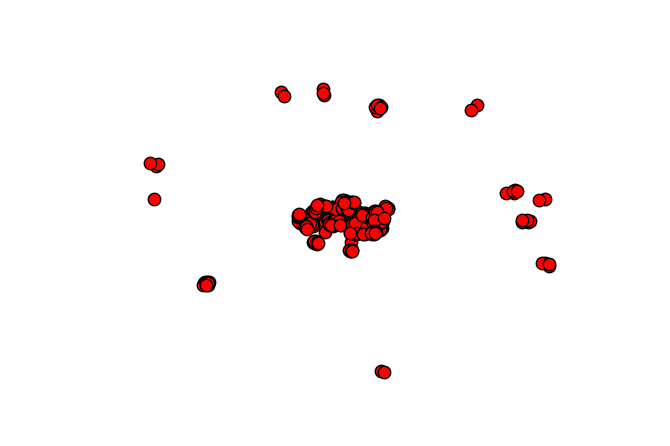

In [26]:
#Visualizing CA_training
pos=nx.spring_layout(CA_training)
nx.draw(CA_training,pos, node_size=80)
plt.show()

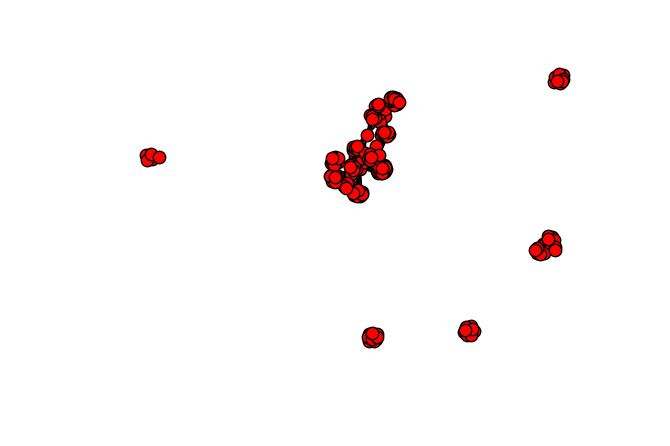

In [27]:
#Visualizing CA_training
pos=nx.spring_layout(CA_testing)
nx.draw(CA_testing,pos, node_size=80)
plt.show()

In [14]:
print 'HIVnet:',len(CAnet),' ','HIVnet_training:',len(CA_training),' ','HIVnet_testing:',len(CA_testing)

HIVnet: 516   HIVnet_training: 381   HIVnet_testing: 187


In [15]:
#Descriptive properties of the co-authorship network
N,K = CAnet.order(), CAnet.size()
avg_deg = float(K)/N
print "Nodes: ", N
print "Edges: ", K
print "Average degree: ", avg_deg

Nodes:  516
Edges:  5114
Average degree:  9.91085271318



Degree ditribution for HIVnet


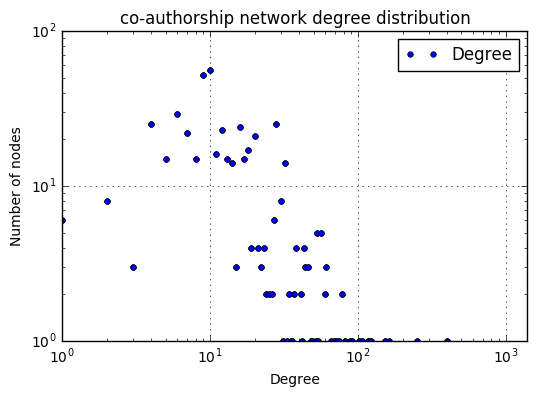

Degree ditribution for HIVnet_training


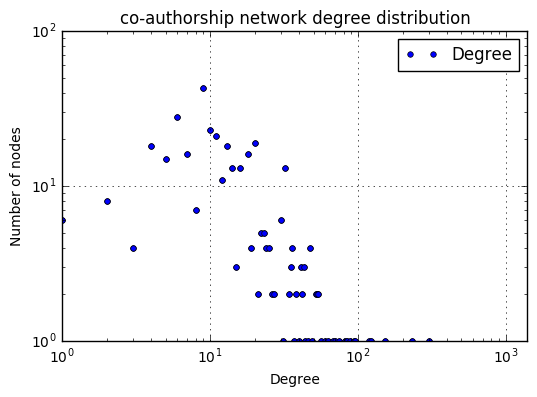

Degree ditribution for HIVnet_testing


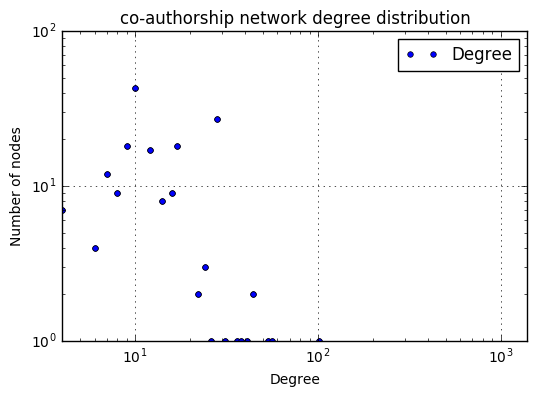

In [16]:
#Degree distribution
print '\nDegree ditribution for HIVnet'
plotDegree(CAnet)
print 'Degree ditribution for HIVnet_training'
plotDegree(CA_training)
print 'Degree ditribution for HIVnet_testing'
plotDegree(CA_testing)

In [17]:
# Clustering coefficient of node 0
print nx.clustering(G, 0)

0.520467836257


In [33]:
# Clustering coefficient of all nodes (in a dictionary)
clust_coefficients = nx.clustering(G)

In [34]:
# Average clustering coefficient
ccs =  clust_coefficients
avg_clust = sum(ccs.values()) / len(ccs)
avg_clust

0.8795418287044662

In [35]:
#Basic network analysis - node centralities
# G_components = nx.connected_component_subgraphs(G)
# G_mc = list(G_components)[0]
# Betweenness centrality
bet_cen = nx.betweenness_centrality(G)
# Closeness centrality
clo_cen = nx.closeness_centrality(G)
# Eigenvector centrality
eig_cen = nx.eigenvector_centrality(G,max_iter=1000)

In [36]:
print 'betweenness:',len(bet_cen),' closeness:',len(clo_cen),' eigenvector:',len(eig_cen)

betweenness: 515  closeness: 515  eigenvector: 515


In [39]:
plt.figure() # you need to first do 'import pylab as plt '
plt.grid(False)
betw=[bet_cen[k] for k in bet_cen]
closn=[clo_cen[k] for k in bet_cen]
m, b = np.polyfit(betw, closn, 1)
plt.plot(betw, closn, 'bo', markersize=4) # in-degree
plt.plot(betw, m*betw + b, 'b-',linewidth=0.5)
# plt.loglog(in_values,in_hist,'bo-')
# plt.plot(out_values, out_hist, 'bv-') # out-degree
# plt.legend(['In-degree', 'Out-degree'])
# plt.legend(['Degree'])
plt.xlabel('Betweenness centrality')
plt.ylabel('Closeness centrality')
#plt.title('network of places in Cambridge')
plt.title('co-authorship network')
# plt.xlim([0, 14*10**2])
plt.show()

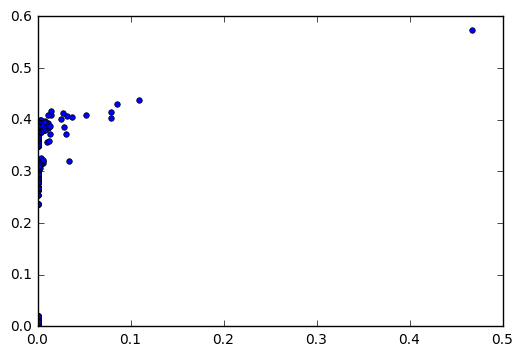

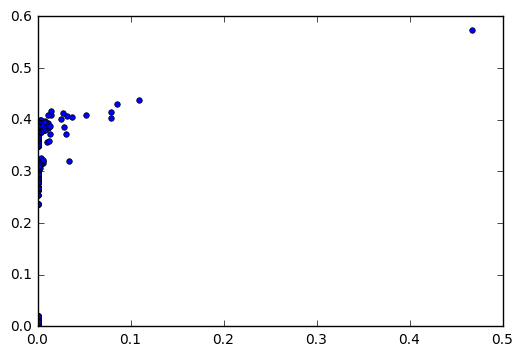

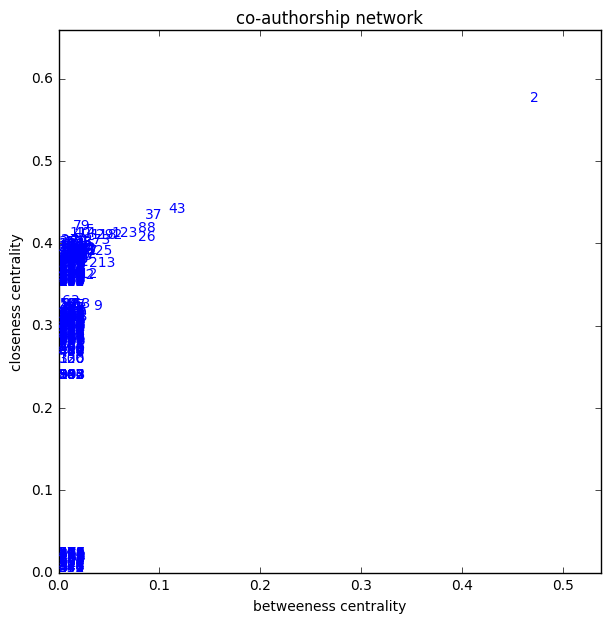

In [40]:
centrality_scatter(bet_cen,clo_cen,ylab="closeness centrality",xlab="betweeness centrality",
                   title="co-authorship network",line=False)

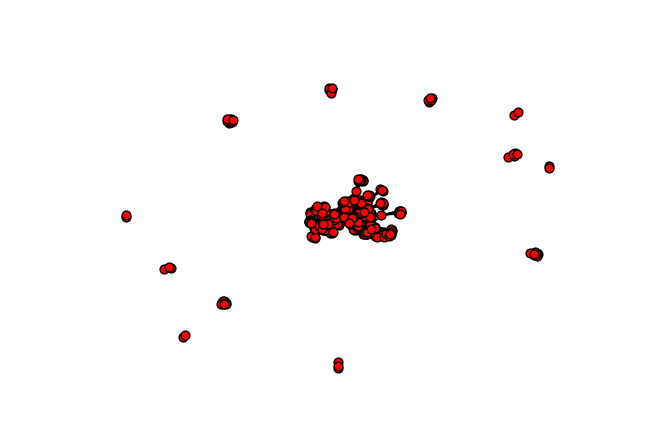

In [41]:
nx.draw(G, node_size=40)
plt.show()

In [42]:
import graphistry

In [43]:
graphistry.register(key='6c62a65d304487581cb45d9b3c693efe287b162432bbb2f9174d2db609e44465315dc0f78d3a8d3987c64a159717b7c1')

In [44]:
nx.write_edgelist(G, "G_edgelist.txt")

In [45]:
f=open('HIVnet_edgelist.csv','wb')
for edge in G.edges(data=True):
    line = CAnet.node[edge[0]]['name']+','+CAnet.node[edge[1]]['name']+','+str(edge[2])+'\n'
    f.write(line)
f.close()
# print f.write.__doc__

In [46]:
# plotter = graphistry.bind(source="source", destination="target")
graph = nx.read_edgelist('HIVnet_edgelist.csv', delimiter=',', nodetype=str)
graphistry.bind(source='src', destination='dst', node='nodeid').plot(graph)

In [18]:
str(CAnet.node[G.edges(data=True)[0][1]]['name'])

'HOUNGBE FABIEN'

In [19]:
CAnet.node[0]['name']

'AHOMADEGBE CHRISTELLE'

In [49]:
#MultiLayer Graph generation
# mnet=pmn.MultiplexNetwork(couplings='categorical',fullyInterconnected=False)

In [50]:
# dir(CA_testing)
# for n in list(CA_testing.edges_iter(data='year')):
#     nd=[a for a in n]
#     nd[-1]=str(n[-1])
#     mnet[nd[0], nd[1], nd[2]] = 1

In [51]:
# pickle.dump( mnet, open( "pickle/multiL_testing.p", "wb" ) )

In [169]:
# fig=pmn.draw(mnet,
# #          layout="circular",
#          layershape="circle",
# #          nodeColorDict={(0,0):"r",(1,0):"r",(0,1):"r"},
#          layerLabelRule={},
#          nodeLabelRule={},
#          show=True,
# #          nodeSizeRule={"rule":"degree","propscale":0.05}
#             )

In [104]:
# for l in in_values:
#     print l,in_hist[in_values.index(l)]

# for paper in corpus:
#     if 'abstract' in dir(paper):
#         print paper['abstract'][:20]
#     else: print 'None'

In [71]:
#type(dir(papers[0]))
#dir(papers[0].__getitem__)
#len(corpus)
# for i in range(0,len(corpus)):
#     print i,' ',corpus[i]['authorAddress']
# dir(corpus[117])

In [23]:
# try:
#     import matplotlib.pyplot as plt
# except:
#     raise

# import networkx as nx
# import math

# try:
# #     from networkx import graphviz_layout
#     from networkx.drawing.nx_agraph import graphviz_layout
# #     layout=nx.graphviz_layout
#     layout=graphviz_layout
# except ImportError:
#     print "PyGraphviz not found; drawing with spring layout; will be slow."
#     layout=nx.spring_layout


# n=150  # 150 nodes
# # p value at which giant component (of size log(n) nodes) is expected
# p_giant=1.0/(n-1)
# # p value at which graph is expected to become completely connected
# p_conn=math.log(n)/float(n)

# # the following range of p values should be close to the threshold
# pvals=[0.003, 0.006, 0.008, 0.015]

# region=220 # for pylab 2x2 subplot layout
# plt.subplots_adjust(left=0,right=1,bottom=0,top=0.95,wspace=0.01,hspace=0.01)
# for p in pvals:
#     G=nx.binomial_graph(n,p)
#     pos=layout(G)
#     region+=1
#     plt.subplot(region)
#     plt.title("p = %6.3f"%(p))
#     nx.draw(G,pos,
#             with_labels=False,
#             node_size=10
#             )
#     # identify largest connected component
#     Gcc=sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)
#     G0=Gcc[0]
#     nx.draw_networkx_edges(G0,pos,
#                            with_labels=False,
#                            edge_color='r',
#                            width=6.0
#                         )
#     # show other connected components
#     for Gi in Gcc[1:]:
#        if len(Gi)>1:
#           nx.draw_networkx_edges(Gi,pos,
#                                  with_labels=False,
#                                  edge_color='r',
#                                  alpha=0.3,
#                                  width=5.0
#                                  )
# plt.savefig("giant_component.png")
# plt.show() # display

In [22]:
# import networkx as nx
# import matplotlib.pyplot as plt
# from networkx.drawing.nx_agraph import graphviz_layout
# import pydot
# d = nx.degree(CAnet)

# nx.draw(CAnet, nodelist=d.keys(), node_size=[v for v in d.values()])
# nx.draw(CAnet, node_size=20,alpha=0.5,node_color="blue", with_labels=False)
# pos=nx.spring_layout(CAnet,iterations=50)
# pos
# nx.draw(CAnet,pos,node_color=range(24),node_size=50,cmap=plt.cm.Blues)

# try:
#    from networkx import graphviz_layout
# except ImportError:
#    raise ImportError("This example needs Graphviz and either PyGraphviz or Pydot")
# pos=graphviz_layout(CAnet,prog='dot',args='')
# pos=graphviz_layout(CAnet,prog='twopi',args='')
# plt.figure(figsize=(8,8))
# nx.draw(CAnet,pos,node_size=20,alpha=0.5,node_color="blue", with_labels=False)
# plt.axis('equal')

# plt.show()

In [34]:
# for cc in nx.connected_components(CAnet).__iter__(): print cc
# CAnet2=CAnet.to_undirected()
# nx.clustering(CAnet2)

In [106]:
#CA.edges()
# nx.clustering(CAnet)
#nx.degree(CA,(u'AKOGBETO', u'MARTIN'))
#CA.neighbors((u'AKOGBETO', u'MARTIN'))
#for auth in CA:
#    print auth
#CA.node[(u'AZONDEKON', u'ROSERIC')]
#CA.degree((u'AZONDEKON', u'ROSERIC'))
#CA.degree((u'AZONDEKON', u'ROSERIC'),weight='weight')
#CA.nodes(data=True)
#CA[(u'AZONDEKON', u'ROSERIC')][(u'HOUEVOESSA', u'SPERAUD')]['weight']
#CA.degree(weight='weight')
#dir(CA)
#print CA.edge_attr_dict_factory.__doc__
# degree=CA.degree().values()
#sorted(CA.degree().values())


In [70]:
# len(dis_name)

In [ ]:
#BASIC NETWORK ANALYSIS

In [33]:
# for n in G.adjacency_iter(): print n

In [20]:
CAnet2=CAnet.copy()
l=CAnet2.edges_iter()
edge=list(l)[100]
edge
dir(CAnet2[edge[0]][edge[1]])
for e in CAnet2[edge[0]][edge[1]].keys():
    print CAnet2[edge[0]][edge[1]][e]['year']
print CAnet2.order(),CAnet2.size()

2012
2014
2011
2012
2011
2013
2013
516 5114


In [22]:
# Subset categorizing the network by period of 2 years
## 1996-1997, 1998-1999, 2000-2001, 2002-2003, 2004-2005, 2006-2007, 2008-2009, 2010-2011, 2012-2013, 2014-2015, 2016
yr = ['1996-1997', '1998-1999', '2000-2001', '2002-2003', '2004-2005',
      '2006-2007', '2008-2009', '2010-2011', '2012-2013', '2014-2015', '2016']
subGraph(CAnet, yr, 'sub1')

1996-1997 :   Nodes: 516  Edges: 0
1998-1999 :   Nodes: 516  Edges: 3
2000-2001 :   Nodes: 516  Edges: 411
2002-2003 :   Nodes: 516  Edges: 281
2004-2005 :   Nodes: 516  Edges: 156
2006-2007 :   Nodes: 516  Edges: 55
2008-2009 :   Nodes: 516  Edges: 663
2010-2011 :   Nodes: 516  Edges: 635
2012-2013 :   Nodes: 516  Edges: 930
2014-2015 :   Nodes: 516  Edges: 1769
2016 :   Nodes: 516  Edges: 211


In [23]:
# Uneven Subsetting of the network
## 1996-2006, 2007-2009, 2010-2011, 2014, 2015, 2016
yr2 = ['1996-2001', '2002-2008', '2009-2010', '2011-2012', '2013-2014', '2015-2016']
subGraph(CAnet, yr2, 'sub2')

1996-2001 :   Nodes: 516  Edges: 414
2002-2008 :   Nodes: 516  Edges: 974
2009-2010 :   Nodes: 516  Edges: 447
2010-2011 :   Nodes: 516  Edges: 635
2011-2012 :   Nodes: 516  Edges: 633
2013-2014 :   Nodes: 516  Edges: 1192
2015-2016 :   Nodes: 516  Edges: 1454


In [24]:
# nx.get_node_attributes(CAnet,'timesCited')
ent=5
print 'name:',temp.node[ent]['name'],'   numb. of Publ.:',temp.node[ent]['numPub'],'   timesCited:',temp.node[ent]['timesCited']

name:

NameError: name 'temp' is not defined